In [2]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATAPATH = 'data/'

In [4]:
data = pd.read_csv(DATAPATH+'palm_oil.csv',delimiter=',',low_memory=False)
data_total = pd.read_csv(DATAPATH+'cleaned_unique_index.csv',delimiter=',',low_memory=False)

In [5]:
data_total.set_index('code',inplace=True)
data.set_index('code',inplace=True)


# Exploring the number of aliments that contain palm oil

In [6]:
total_count = data_total.shape[0]
palm_oil_count = data.shape[0]
percentage = palm_oil_count / total_count * 100

print("We have a total of %d articles entered" % total_count)
print("Out of those we have information about palm oil on %d articles " % palm_oil_count)
print("This represents %f %% " % percentage)

We have a total of 665693 articles entered
Out of those we have information about palm oil on 387961 articles 
This represents 58.279267 % 


- While this amount seems not enough it is still more than half articles. We remove from our study all articles that we do not have information about as they could make future analysis biased. The sample of size 387964 is still a fairly large sample size that we can make some statistical analysis on

In [7]:
data.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags
code,,,,,,
0000000001199,0.0,NaN,NaN,0.0,NaN,NaN
0000000001663,0.0,NaN,NaN,0.0,NaN,NaN
0000000002264,0.0,NaN,NaN,0.0,NaN,NaN
0000000003827,0.0,NaN,NaN,0.0,NaN,NaN
0000000004510,0.0,NaN,NaN,0.0,NaN,NaN


In [12]:
contains_palm = data[data['ingredients_from_palm_oil_n'] > 0.0]
may_contain_palm = data[data['ingredients_that_may_be_from_palm_oil_n'] > 0.0]
contains_palm['count'] = 1
may_contain_palm['count'] = 1


C:\Users\johan\Anaconda3\envs\ada\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\johan\Anaconda3\envs\ada\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
contains_palm.index.difference(may_contain_palm.index)
# This can be useful to see that there is some correlation between may_contain <->contains

Index(['0000000290616', '0000069006562', '00023092', '00035460', '00052283',
       '00087728', '00088749', '00096225', '00099202', '00101356',
       ...
       '9556085735739', '9556121020164', '9556417639339', '9556439887497',
       '9556587103869', '96121283', '9714176130355', '98152056', '98797554',
       '99515874'],
      dtype='object', name='code', length=8229)

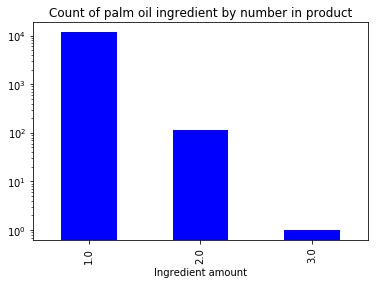

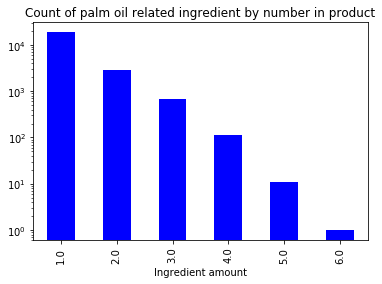

In [23]:
count_palm = contains_palm.groupby("ingredients_from_palm_oil_n")['count'].count()
count_may = may_contain_palm.groupby("ingredients_that_may_be_from_palm_oil_n")['count'].count()
count_palm.plot.bar(logy=True,title="Count of palm oil ingredient by number in product",color='b')
plt.xlabel("Ingredient amount")
plt.show()
count_may.plot.bar(logy=True,title="Count of palm oil related ingredient by number in product",color='b')
plt.xlabel("Ingredient amount")
plt.show()

- We can see that that most of the product seem to have only one ingredient or two that are related to palm oil
- However the product that may contains palm oil can have a little more ingredients. 

In [20]:
## One can wonder how much this represents 
cnt_palm = contains_palm.shape[0] 
may_cnt_palm = may_contain_palm.shape[0]
print("There is %d articles that contain palm oil."%cnt_palm)
print("There is %d articles that may contain palm oil "%may_cnt_palm)
correlation = data["ingredients_from_palm_oil_n"].corr(data["ingredients_that_may_be_from_palm_oil_n"],method="pearson")
print("The correlation between food that contains palm oil and that may contains palm oil is %f " % correlation)

There is 11768 articles that contain palm oil.
There is 22433 articles that may contain palm oil 
The correlation between food that contains palm oil and that may contains palm oil is 0.193331 


In [25]:
food_origin = pd.read_csv(DATAPATH+"food_origins.csv")
food_origin.set_index("code", inplace=True)
food_origin.head()

,origins_tags,origins_tags.1,manufacturing_places_tags
code,,,
0000000020114,NaN,NaN,france
0000000274722,france,france,france
0000000290616,quebec,quebec,brossard-quebec
0000000394710,quebec,quebec,brossard-quebec
0000001071894,france,france,united-kingdom


In [27]:
contains_palm.join(food_origin).shape[0], contains_palm.shape[0],food_origin.shape[0]

(11768, 11768, 86142)

In [125]:
x = contains_palm.join(data_total["origins"],how='inner').dropna(subset=["origins"])
# pd.concat([pd.Series(row['count'], row['origins'].split(','))              
#                     for _, row in x.iterrows()]).reset_index()
z = x["origins"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
z.columns = ["origins"]
z = z.reset_index().set_index("code")
z = z[["origins"]]
z = z["origins"].value_counts()
top_ten = z[z > 5]

- We notice that a lot of places seem to be from france. But we cant really see the trend as it is often in a bad format.


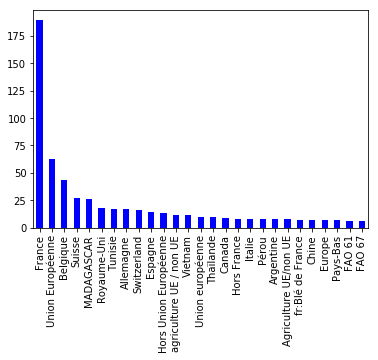

In [126]:
top_ten.plot.bar(color='b')

- Note that this is not 100% representative as the database is french so tehre is more products that come from France that are logged. 